In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
import sklearn
from sklearn import tree
from math import log

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

In [25]:
note = pd.read_json("data_4.txt")

In [26]:
note

,game,rank,gold,rerolls,units,player,move_freq,main_trait,level_one,level_two,level_three,rarity_one,rarity_two,rarity_three,rarity_four,rarity_five
1,VN1_3655815269,4,298,49,49,7863217,25,Set3_Celestial,1,7,0,2,2,1,2,1
2,VN1_3655805705,3,335,38,51,18250278,31,Battlecast,2,5,2,2,1,2,3,1
3,VN1_3655815278,3,235,59,45,14856370,50,Set3_Blademaster,0,5,2,3,1,1,2,0
4,VN1_3655815321,1,421,39,65,1812899,37,Sniper,1,9,0,1,1,1,4,3
5,VN1_3655806749,7,326,61,79,605012,43,DarkStar,3,4,2,2,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101996,VN1_3663238429,8,237,24,49,31084573,26,Set3_Brawler,1,8,0,2,2,2,2,1
101997,VN1_3663237119,2,398,35,80,60234352,16,Vanguard,1,8,1,3,3,1,1,2
101998,VN1_3663225418,3,347,73,59,58208651,27,Chrono,1,7,0,0,2,1,4,1
101999,VN1_3663226957,7,322,27,62,59616094,11,Set3_Mystic,1,5,1,0,1,3,3,0


In [27]:
note["rank"]

note["gold"]

note["rerolls"]

note["units"]

1         49
2         51
3         45
4         65
5         79
          ..
101996    49
101997    80
101998    59
101999    62
102000    79
Name: units, Length: 102000, dtype: int64

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

note[['gold', 'rerolls', 'units', 'move_freq']] = scaler.fit_transform(note[['gold', 'rerolls', 'units', 'move_freq']])

#X = note[['gold', 'rerolls', 'units', 'move_freq', 'main_trait_encoded']]

X1 = note[['gold', 'rerolls', 'units', 'move_freq', 'main_trait']]
# labelencoder = LabelEncoder()
# note['main_trait_encoded'] = labelencoder.fit_transform(note['main_trait'])

X2 = note[['gold', 'rerolls', 'units', 'move_freq']]

X3 = note[['gold', 'rerolls', 'units']]


X1 = pd.get_dummies(X1)

X1 = X1.drop(columns=['main_trait_Vanguard'])

y = note[['rank']]

# full_data

In [30]:
move_freq = pd.read_json("move_freq.txt", orient = "index")

move_freq

,game,player,move_freq,rank
1,VN1_3655815269,7863217,25,4
2,VN1_3655805705,18250278,31,3
3,VN1_3655815278,14856370,50,3
4,VN1_3655815321,1812899,37,1
5,VN1_3655806749,605012,43,7
...,...,...,...,...
101996,VN1_3663237119,60234352,26,2
101997,VN1_3663225418,58208651,16,3
101998,VN1_3663226957,59616094,27,7
101999,VN1_3663227039,39900321,11,5


In [49]:
import statsmodels.formula.api as smf
import matplotlib as plt

# model = LinearRegression()
# model.fit(X1, y)
model = sm.OLS(y, sm.add_constant(X1))
model_fit = model.fit()
dataframe = pd.concat([X, y], axis=1)

# Residuals VS Fitted
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]


plot_lm_1 = plt.figure()
# .Figure()
# plot_lm_1 = plt.figure( figsize =(7,7) )
# plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
#                           lowess=True)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 102000 and the array at index 1 has size 102001

R_sq score
0.09827684954451588
0.09797992364248542
[-2.50323552e+01  2.79055376e+00 -1.19529558e+01  3.99730008e-02
 -1.74344239e-01 -1.33461433e-03 -1.84285521e-02 -1.05415962e-01
 -4.40522501e-02 -1.92277180e-02 -2.60494381e-01 -1.35971490e-02
  6.30085170e-01 -1.33293908e-01 -1.11775934e-01 -4.62725252e-02
 -2.80766272e-01 -1.81128381e-02 -3.26415653e-02 -1.86094399e-02
 -6.81954198e-02 -1.56353677e-02 -1.15236987e-01  2.71319536e-02
 -7.90562401e-02 -4.42161277e-02 -1.30371134e-02 -1.87265424e-01]
Feature: 0, Score: -25.03236
Feature: 1, Score: 2.79055
Feature: 2, Score: -11.95296
Feature: 3, Score: 0.03997
Feature: 4, Score: -0.17434
Feature: 5, Score: -0.00133
Feature: 6, Score: -0.01843
Feature: 7, Score: -0.10542
Feature: 8, Score: -0.04405
Feature: 9, Score: -0.01923
Feature: 10, Score: -0.26049
Feature: 11, Score: -0.01360
Feature: 12, Score: 0.63009
Feature: 13, Score: -0.13329
Feature: 14, Score: -0.11178
Feature: 15, Score: -0.04627
Feature: 16, Score: -0.28077
Feature: 17

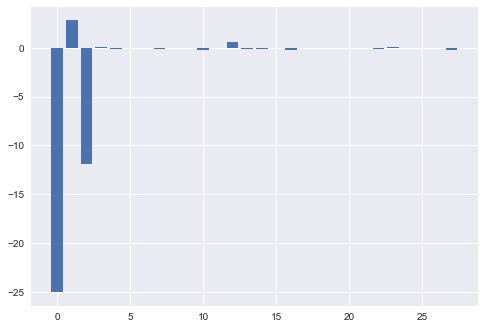

In [31]:
# define the model
model = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
# fit the model
model.fit(X1, y)

print("R_sq score")
print(model.score(X1, y))

model2.fit(X2,y)

print(model2.score(X2,y))

model3.fit(X3,y)
# get importance
importance = model.coef_

print(importance[0])

#summarize feature importance
for i,v in enumerate(importance[0]):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance[0]))], importance[0])
pyplot.show()

In [8]:
def calculate_bic(n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic

#------model1------------

# number of parameters
# num_params = len(model.coef_) + 1
num_params = 28 + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(X1)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)


#------model2------------
num_params = 4 + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model2.predict(X2)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)


#------model3------------
num_params = 3 + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model3.predict(X3)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)



Number of parameters: 29
MSE: 5.076
BIC: 166042.466
Number of parameters: 5
MSE: 5.078
BIC: 165799.262
Number of parameters: 4
MSE: 5.078
BIC: 165787.945


In [31]:
rfe = RFE(model, 28)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [34]:
rfe = RFE(model2, 4)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X2,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True]
[1 1 1 1]


C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jingj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Feature: 0, Score: 0.51924
Feature: 1, Score: 0.12328
Feature: 2, Score: 0.11695
Feature: 3, Score: 0.11416
Feature: 4, Score: 0.00254
Feature: 5, Score: 0.00882
Feature: 6, Score: 0.00453
Feature: 7, Score: 0.00722
Feature: 8, Score: 0.00905
Feature: 9, Score: 0.00848
Feature: 10, Score: 0.00032
Feature: 11, Score: 0.00398
Feature: 12, Score: 0.00014
Feature: 13, Score: 0.00489
Feature: 14, Score: 0.00005
Feature: 15, Score: 0.00155
Feature: 16, Score: 0.00006
Feature: 17, Score: 0.00701
Feature: 18, Score: 0.00550
Feature: 19, Score: 0.01090
Feature: 20, Score: 0.00418
Feature: 21, Score: 0.00783
Feature: 22, Score: 0.00425
Feature: 23, Score: 0.00450
Feature: 24, Score: 0.00741
Feature: 25, Score: 0.01094
Feature: 26, Score: 0.01221
Feature: 27, Score: 0.00002


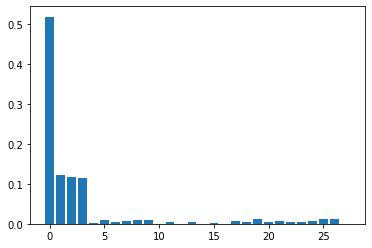

In [32]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.24405
Feature: 1, Score: 0.16158
Feature: 2, Score: 0.15899
Feature: 3, Score: 0.20174
Feature: 4, Score: 0.00375
Feature: 5, Score: 0.01646
Feature: 6, Score: 0.00810
Feature: 7, Score: 0.01265
Feature: 8, Score: 0.01759
Feature: 9, Score: 0.01650
Feature: 10, Score: 0.00038
Feature: 11, Score: 0.00598
Feature: 12, Score: 0.00017
Feature: 13, Score: 0.00757
Feature: 14, Score: 0.00012
Feature: 15, Score: 0.00254
Feature: 16, Score: 0.00011
Feature: 17, Score: 0.01281
Feature: 18, Score: 0.00991
Feature: 19, Score: 0.02045
Feature: 20, Score: 0.00683
Feature: 21, Score: 0.01522
Feature: 22, Score: 0.00617
Feature: 23, Score: 0.00879
Feature: 24, Score: 0.01370
Feature: 25, Score: 0.02345
Feature: 26, Score: 0.02430
Feature: 27, Score: 0.00005


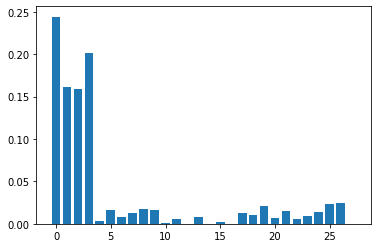

In [33]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

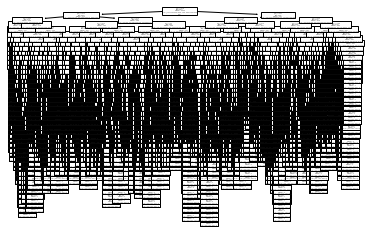

In [24]:
tree.plot_tree(model);